In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_11_23/gap2023_01_11_17_52_21_ring_L8', delimiter = ',')


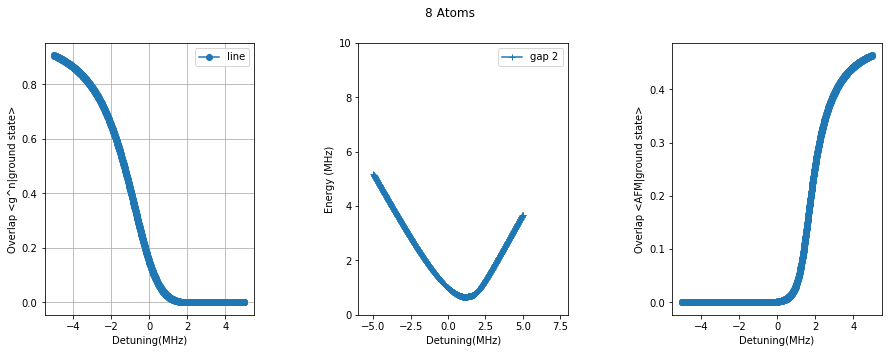

In [4]:

fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('8 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[2].plot(data[1],data[5],marker='o')
ax[2].set_xlabel('Detuning(MHz)')
ax[2].set_ylabel('Overlap <AFM|ground state>')
# ax[1].plot(data[1], data[2]/2/np.pi,marker='o',label='0th')

# ax[1].plot(data[1], data[3]/2/np.pi,marker='o',label='1st')
# ax[1].plot(data[1], data[6]/2/np.pi,marker='o',label='2nd')
ax[1].plot(data[1], (data[6]-data[2])/2/np.pi,marker='+',label='gap 2')
#ax[1].plot(data[1], (data[7]-data[2])/2/np.pi,marker='+',label='gap 3')

ax[1].set_xlabel('Detuning(MHz)')
ax[1].set_ylabel('Energy (MHz)')
ax[1].set_xlim([-6,8])
ax[1].set_ylim([0,10])
ax[1].legend()
ax[0].plot(data[1], data[4],marker='o',label='line')
ax[0].set_xlabel('Detuning(MHz)')
ax[0].set_ylabel('Overlap <g^n|ground state>')
ax[0].legend()
ax[0].grid()

In [5]:
gap = (data[6]-data[2])/2/np.pi
detuning = data[1]
t = data[0]
crit_id = np.argmin(gap)
print('intial_detuning'+str(detuning[0]))
print('intial_gap'+str(gap[0]))
print('crit_id ', crit_id)
print('crit_t'+str(t[crit_id]))
print('crit_detuning'+str(detuning[crit_id]))
print('crit_gap'+str(gap[crit_id]))
print('final_detuning'+str(detuning[-1]))
print('final_gap'+str(gap[-1]))

intial_detuning-5.0
intial_gap5.167765717952992
crit_id  613
crit_t6.13
crit_detuning1.13
crit_gap0.6614374104993129
final_detuning4.989999999999999
final_gap3.6804391687192477


Text(0, 0.5, 'overlap with 1st excited state')

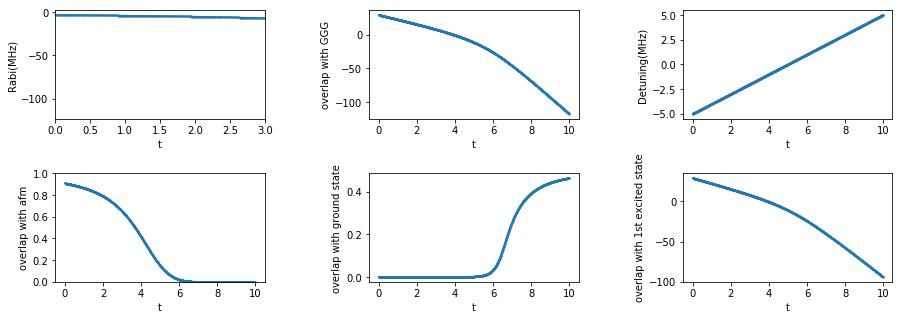

In [6]:

fig, ax = plt.subplots(2, 3, figsize=(15,5))
#fig.suptitle('19 Atoms')
#op_list1 = ['t','Detuning','rabi','overlap_g','overlap_afm','overlap_0','overlap_1','overlap_2','overlap_3']
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')


In [7]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_11_23/Overlap2023_01_11_18_25_10_L8_1',delimiter=',')

Text(0, 0.5, 'overlap with 1st excited state')

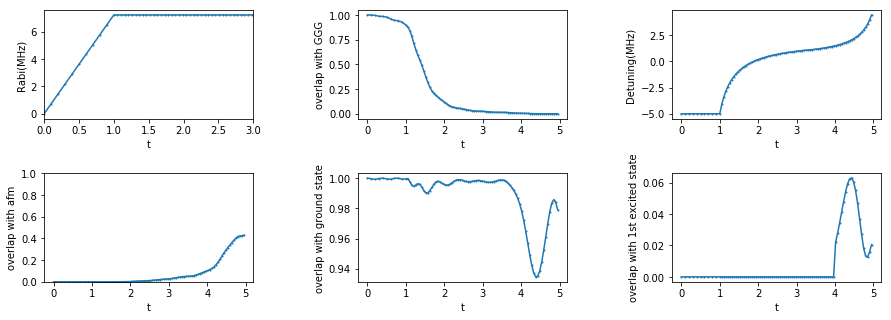

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
#fig.suptitle('19 Atoms')
#op_list1 = ['t','Detuning','rabi','overlap_g','overlap_afm','overlap_0','overlap_1','overlap_2','overlap_3']
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')


In [9]:
def DILILA(t,t_len, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit*(tinflect -t)
    denomsteps1 = gapinit* t + gapcrit * (tinflect - t)
    numstep2 = gapfin* dcrit*(t_len - t ) + gapcrit* dfin*(t-tinflect)
    denomsteps2 = gapfin*(t_len -t) +gapcrit*(t-tinflect)
    if t>t_len:
        out = dfin
    elif t>tinflect:
        out = numstep2/denomsteps2
    else:
        out = numstep1/denomsteps1
    return out
def Deltafunc(time):
    t = time - Rabi_ramp_time
    if t<0:
        return dinit
    else:
        return DILILA(t,T_DiLILA, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect)

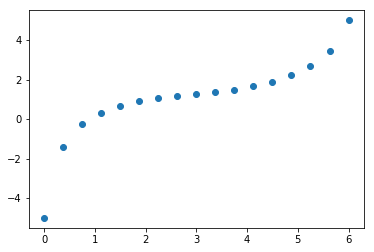

In [12]:
time = np.linspace(0,6,17)
det = []
Rabi_ramp_time = 0
T_DiLILA = 4
dinit = -5
gapinit = 5.17
gapcrit = 0.6614
dcrit = 1.13
gapfin = 3.68

dfin = 5
tinflect = 2.452
for i in range(len(time)):
    det.append(Deltafunc(time[i]))
plt.plot(time, np.array(det),marker = 'o',ls = '')

In [25]:
6.13/10*4

2.452

In [17]:
L1 = 8
pos_occupied = [False]+[True]*(L1-1)
pos_occupied[1]= False
pos_occupied

[False, False, True, True, True, True, True, True]